In [1]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_log_error

In [2]:
#2. Import dataset
data = pd.read_csv("D:\Tài liệu PTDLKD\Data_stock_HVN_VN.csv")
data

,time,open,high,low,close,volume
0,2019-03-01,30274,31432,30274,31278,1231293
1,2019-03-04,31046,33209,31046,33131,2159830
2,2019-03-05,33209,36298,32668,32900,1352465
3,2019-03-06,32050,33054,32050,32745,815962
4,2019-03-07,32591,33054,32359,32436,713115
...,...,...,...,...,...,...
1302,2024-05-27,24200,25350,24000,25150,6719200
1303,2024-05-28,25300,26900,24500,26900,9317700
1304,2024-05-29,26900,28450,26900,28300,6449500
1305,2024-05-30,28300,28500,26800,27700,6116600


In [3]:
#3. Partition the data into necessary segments
data_model = data[['close']]
split = int(len(data)*0.9)
train = data_model[:split]
test = data_model[split:]

In [4]:
#4. Using auto ARIMA to find the most suitable p, d, q and fit with model
model = auto_arima(train, trace=True, error_action='ignore', suppress_warnings=True)
model.fit(train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=17777.981, Time=0.46 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=17812.518, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=17784.976, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=17778.888, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=17812.074, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=17775.984, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=17774.086, Time=0.09 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=17776.090, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=17774.968, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=17777.343, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=17773.477, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=17778.116, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=17775.391, Time=0.07 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=17775.498, Time=0.07 sec
 ARIMA(1,1,1)(0,0,0

ARIMA(order=(0, 1, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [5]:
#5. Check the p-value to see if it is statistically significant
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1176
Model:               SARIMAX(0, 1, 2)   Log Likelihood               -8883.738
Date:                Thu, 06 Jun 2024   AIC                          17773.477
Time:                        02:37:36   BIC                          17788.684
Sample:                             0   HQIC                         17779.211
                               - 1176                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.1658      0.020      8.466      0.000       0.127       0.204
ma.L2         -0.0727      0.022     -3.235      0.001      -0.117      -0.029
sigma2      2.158e+05   6575.936     32.815      0.0

In [6]:
#6. Predict on the test data
predictions = model.predict(n_periods=len(test)+90)
predict_test = predictions[:-90]

In [7]:
#7. Evaluate model performance using RMSE, MAPE, and MSLE
rmse = np.sqrt(mean_squared_error(test, predict_test))
mape = mean_absolute_percentage_error(test, predict_test) * 100
msle = mean_squared_log_error(test, predict_test)
print("RMSE:", rmse)
print("MAPE:", mape ,"%")
print("MSLE:", msle)

RMSE: 5375.162436299349
MAPE: 19.901170946956455 %
MSLE: 0.11742652132438126


In [8]:
#8. Predict close prices for the next 30, 60, 90 days
next_30_days = predictions[-90:-60]
next_60_days = predictions[-90:-30]
next_90_days = predictions[-90:]

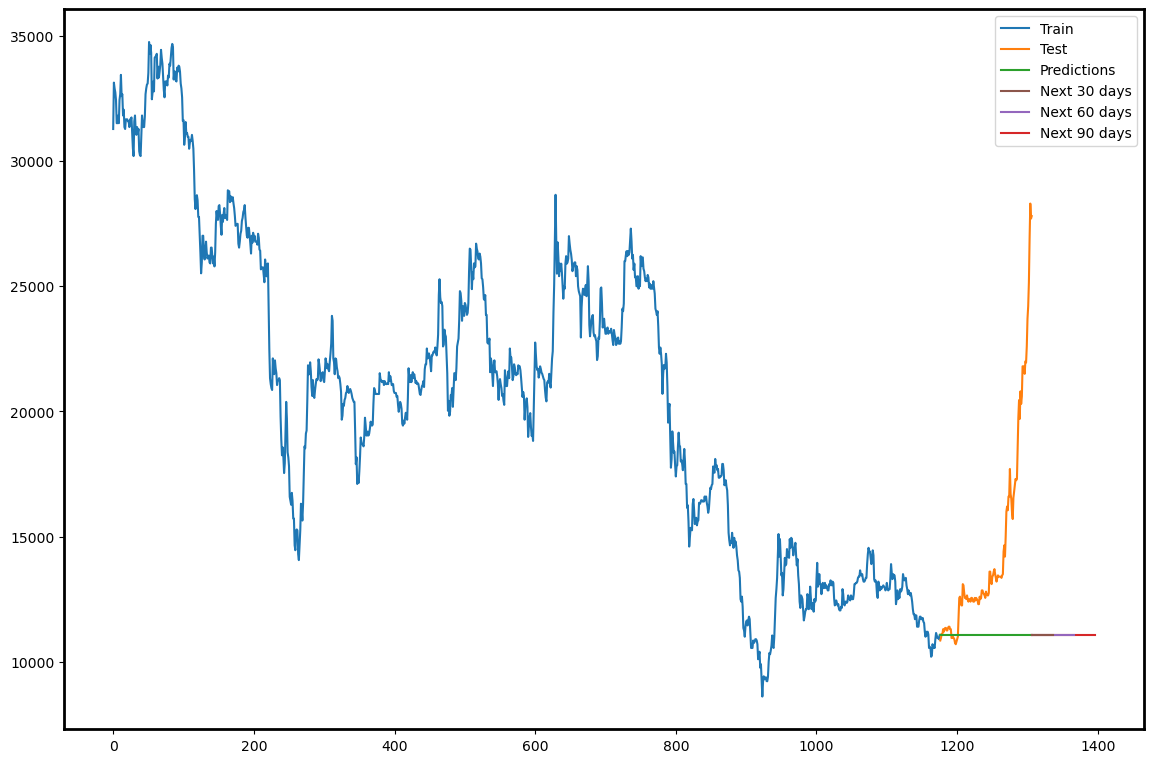

In [9]:
#9. Draw the plot
plt.figure(figsize=(12, 8))
line1, = plt.plot(train.index, train["close"], label="Train")
line2, = plt.plot(test.index, test['close'], label="Test")
line3, = plt.plot(test.index, predict_test, label="Predictions")
line4, = plt.plot(next_90_days.index, next_90_days, label="Next 90 days")
line5, = plt.plot(next_60_days.index, next_60_days, label="Next 60 days")
line6, = plt.plot(next_30_days.index, next_30_days, label="Next 30 days")
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)
for spine in plt.gca().spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(2)
plt.legend(handles=[line1, line2, line3, line6, line5, line4])
plt.savefig("D:\Tài liệu PTDLKD\Image_Result\ARIMA_HVN_91.png")
plt.show()
